In [1]:
!pip install scikit-learn
!pip install tensorflow numpy matplotlib
!pip install keras
!pip install numpy matplotlib scikit-learn keras

In [ ]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
 
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])
#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)

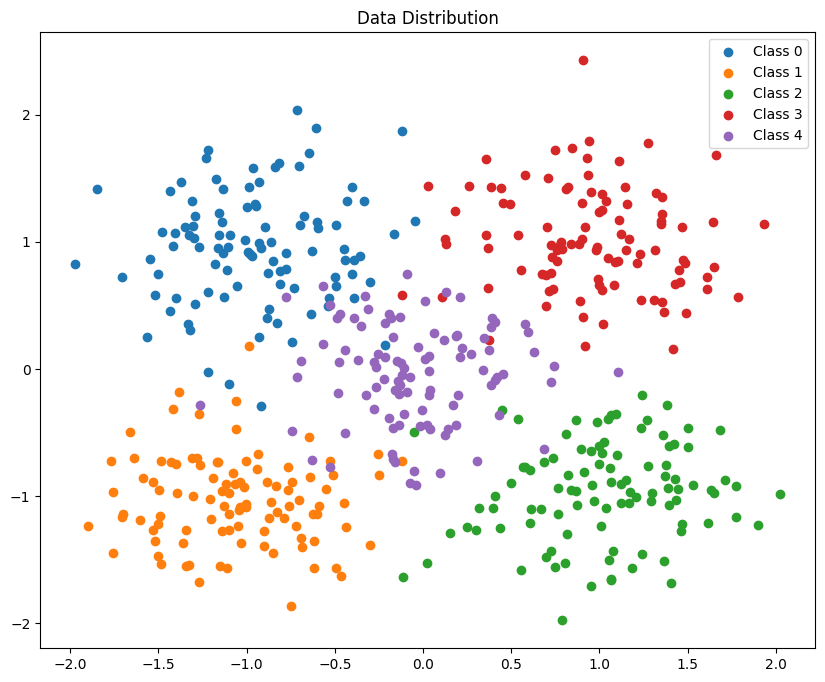

Original labels: [3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3

C:\Users\prave\.conda\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.3769 - loss: 1.3196
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8680 - loss: 0.6518
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9144 - loss: 0.4347
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9390 - loss: 0.3264
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9421 - loss: 0.2718
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9390 - loss: 0.2641
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9525 - loss: 0.2288
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9541 - loss: 0.2233
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9542 - loss: 0.2089
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9365 - loss: 0.2197
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9397 - loss: 0.2063
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step

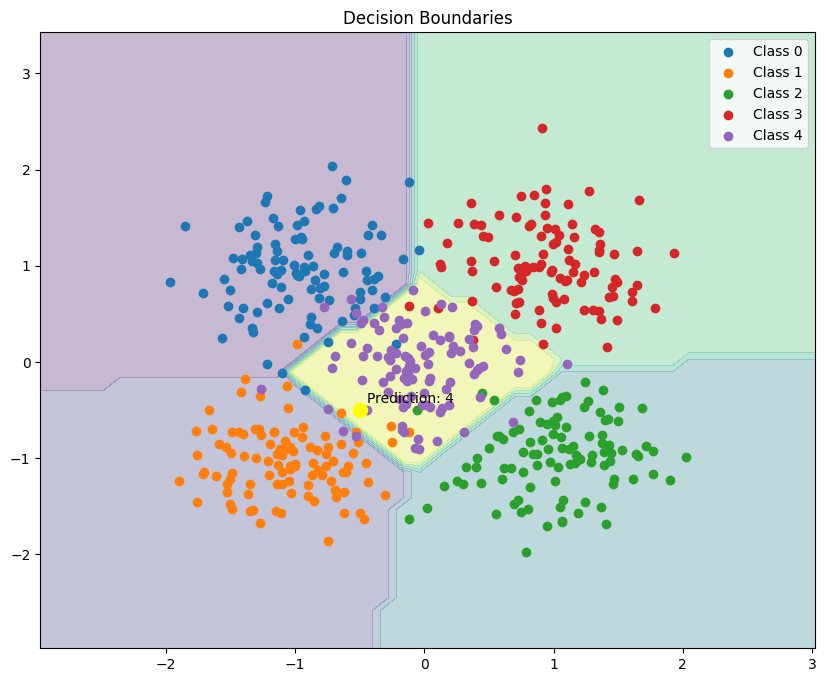

Prediction is: 4


In [11]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

plt.figure(figsize=(10, 8))
for i in range(5):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=f'Class {i}')
plt.legend()
plt.title('Data Distribution')
plt.show()

print("Original labels:", y)
y_cat = to_categorical(y, 5)
print("Categorical labels:", y_cat)

model = Sequential([
    Dense(5, input_shape=(2,), activation='softmax')
])

model.compile(Adam(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y_cat, verbose=1, batch_size=50, epochs=100)

def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.3)

plt.figure(figsize=(10, 8))
plot_multiclass_decision_boundary(X, y_cat, model)
for i in range(5):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=f'Class {i}')
plt.legend()
plt.title('Decision Boundaries')

x, y = -0.5, -0.5
point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis=1)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
plt.annotate(f'Prediction: {prediction[0]}', (x, y), xytext=(5, 5), textcoords='offset points')
plt.show()

print("Prediction is:", prediction[0])